Importing packages

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

#Importing the Dataset

In [2]:
df_movies= pd.read_csv("C:\Insaid\Project_data\movies data_1000.csv")

# Data Profiling

#3.1 Understanding the Dataset

In [3]:
df_movies.shape

(1000, 12)

In [4]:
df_movies.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [5]:
df_movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [6]:
df_movies.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

#conclusion - 
Data missing in revenue and Metascore columns.
This is descrete data and hence difficult to predict.

## 3.1.2Finding duplicate values.

Titles are registered and hence little chance in duplicate values.



In [57]:
df_movies['Title'].is_unique

False

#Title,Director and Genre combination should be good enough to check the duplicate values in the dataset since Title column is not unique.

In [59]:
df_movies[df_movies.duplicated(['Title','Genre','Director'])].size

0

# Conclusion
#There are no duplicate rows in the data.

### preprofiling

In [60]:
profile = pandas_profiling.ProfileReport(df_movies)
profile.to_file(outputfile="Movies_preprocessing.html")

# updating missing values of revenue and Metascore


In [61]:
df_missingrevenue=df_movies[(df_movies['Revenue (Millions)']==0) |(df_movies['Revenue (Millions)'].isnull()==True) ]


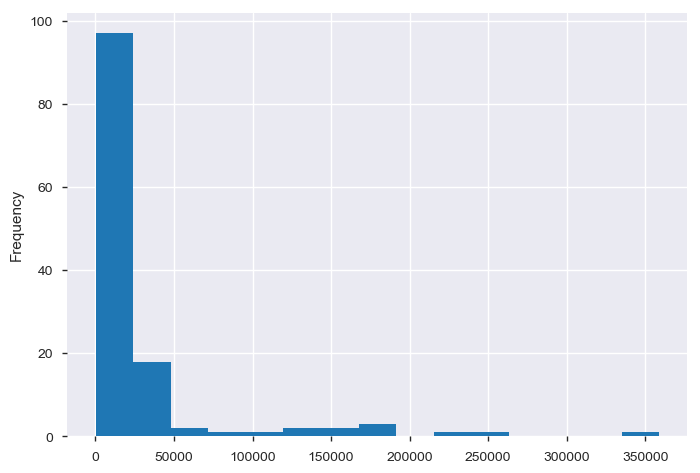

In [11]:
df_missingrevenue['Votes'].plot.hist(bins=15)

In [62]:
df_movies[(df_movies['Votes'] <50000)].count()
print(df_movies[(df_movies['Votes'] <50000)]['Revenue (Millions)'].mean())
print(df_movies[(df_movies['Votes'] <50000)]['Revenue (Millions)'].mode())
print(df_movies[(df_movies['Votes'] <50000)]['Revenue (Millions)'].median())

#df_movies[(df_movies['Votes'] < 50000)]['Revenue (Millions)'].plot.hist(bins=12)

15.817541899441347
0    0.03
dtype: float64
4.21


In [63]:
df_movies_sorted=df_movies[(df_movies['Votes'] < 50000)]['Revenue (Millions)'].sort_values()
type(df_movies_sorted)
print(df_movies_sorted[~df_movies_sorted.isnull()].mean())
print(df_movies_sorted[~df_movies_sorted.isnull()].mode())
print(df_movies_sorted[~df_movies_sorted.isnull()].median())


15.817541899441336
0    0.03
dtype: float64
4.21


#conclusion -There is a strong positive corelarion between votes and revenue.90% of the revenue values are missing for movies where votes received are less than 50000.
Missing values for revenue can be replaced with median of revenue earned for movies getting  less than 50k votes

In [64]:
median_revenue =df_movies[(df_movies['Votes'] <50000)]['Revenue (Millions)'].median()
df_movies['Revenue (Millions)'].fillna(median_revenue,inplace=True)

In [7]:
print(df_movies[df_movies['Metascore'].isnull()==True]['Rating'].mean())
print(df_movies['Rating'].mean())
Metascore_mean=df_movies['Metascore'].mean()
print(Metascore_mean)

6.635937500000001
6.723200000000003
58.98504273504273


#Rating and Metascore show a strong positive correlation when plotted a scatter plot.
mean and median of rating are very close. similarly mean and median of metascore are
very close hence tyhe data is normal and not skewed. Replacing missing values of metascore with mean of metascore.

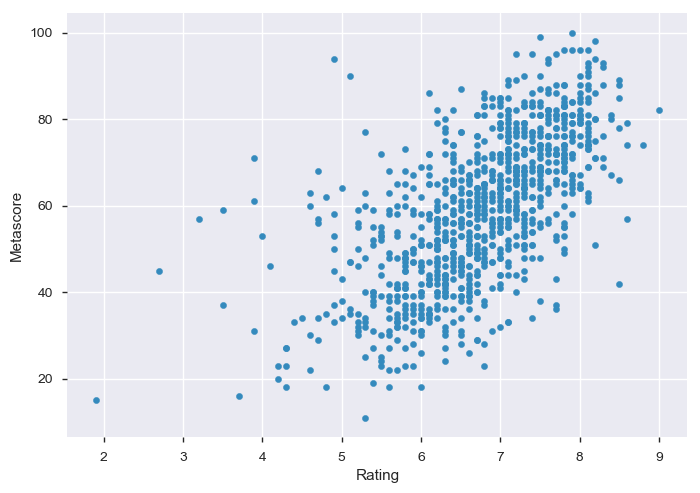

In [66]:
df_movies.plot.scatter(x='Rating', y='Metascore')


In [67]:
df_movies['Metascore'].fillna(Metascore_mean,inplace=True)
df_movies[df_movies['Metascore'].isnull()==True]['Metascore'].count()

0

In [68]:
df_movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,72.876840,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,99.940506,16.634858
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,4.210000,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,37.145000,58.985043
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# Post Profiling

In [69]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df_movies)
profile.to_file(outputfile="Movies_after_preprocessing.html")

# Questions
1>What is the trend of releases of movies per year?

2)What is the average runtime of the movies per year?

3)What is therelation between runtime and revenue?

4)which range most of the movies fall in?

5)What are the top 10 generes which earned good revenue?

6)What is the correlartion between votes and rating?

7) What is the correlartion between votes and Metascore?

8)What was the trend of voting by viewers per year?

9)what was the average revenue per year?

10)movies released and Genre they belong to

11)in which range of metascore maximum movies fall?

12)Directors appreciated by critics( metascore > 75)

#Trend of number of movies releaed from 2006 to 2016

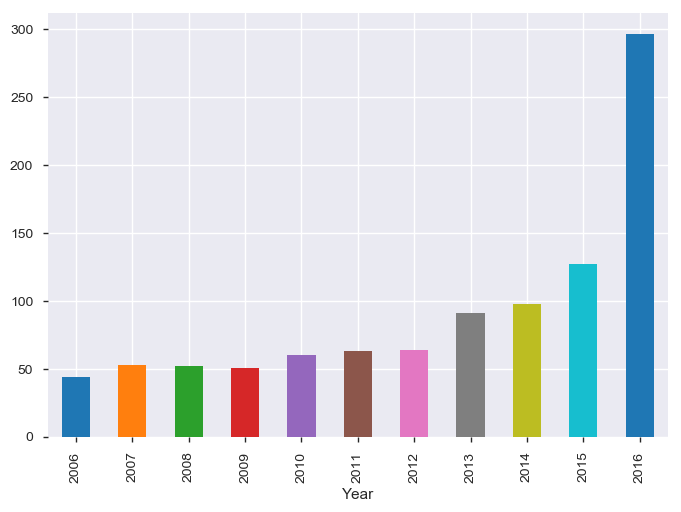

In [12]:
df_movies.groupby('Year').size().plot.bar()

#The trend is upward moving from 2006. 2009 oneards there is contuniuous upward trend
We can see an exponential growth of the movie business since 2012.Valid reason could be Action against piracy,bettered marketing due to increased popularity of content on internet.


#What are the average runtimes of movies over the years?

In [75]:
df_movies.groupby('Year')['Runtime (Minutes)'].median()

Year
2006    117.0
2007    116.0
2008    110.0
2009    109.0
2010    108.0
2011    112.0
2012    114.5
2013    115.0
2014    110.0
2015    115.0
2016    106.0
Name: Runtime (Minutes), dtype: float64

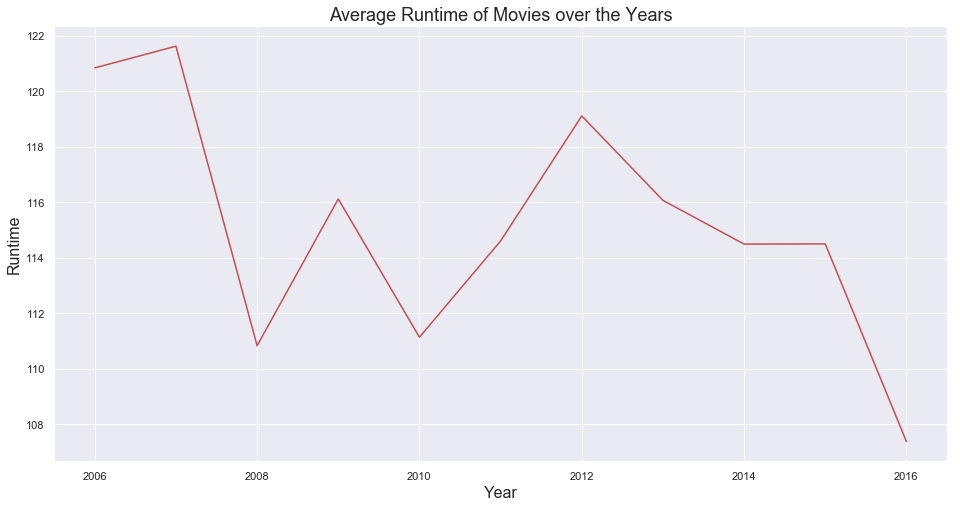

In [6]:
df_movies.groupby('Year')['Runtime (Minutes)'].mean().plot(kind='line', figsize = (16, 8), color = 'r')
plt.title('Average Runtime of Movies over the Years', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Runtime', fontsize = 16);

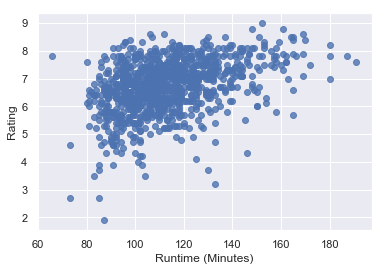

In [10]:
#df_movies.groupby('Year')['Runtime (Minutes)'].mean().plot(kind='line', figsize = (16, 8), color = 'r')
sns.regplot(x = df_movies['Runtime (Minutes)'], y = df_movies['Rating'], fit_reg = False)

#Movies with longer runtime have got better ratings

#Finding correlation between runtime and revenue

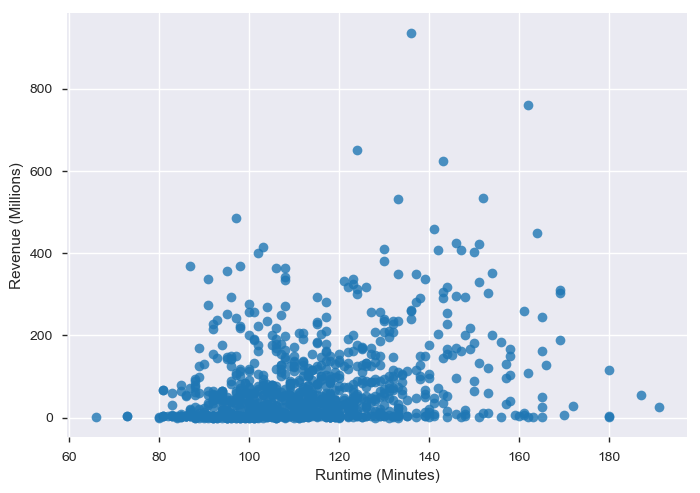

In [77]:

sns.regplot(x = df_movies['Runtime (Minutes)'], y = df_movies['Revenue (Millions)'], fit_reg = False)

There is no correlation found between length of movie and runtime of a movie. 

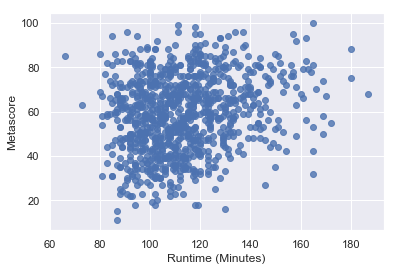

In [4]:
sns.regplot(x = df_movies['Runtime (Minutes)'], y = df_movies['Metascore'], fit_reg = False)

#There is no strong reltion found between length of movies and metascore

# Revenue histogram

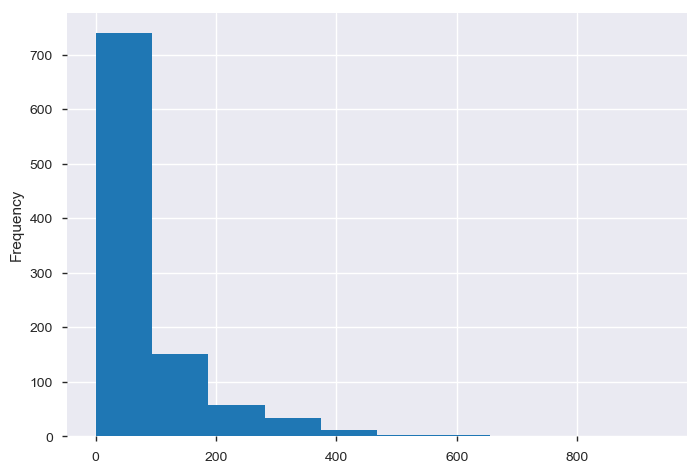

In [78]:
df_movies['Revenue (Millions)'].plot.hist()

75% moviews have theirt revenue below 100 million.12.5% movies fall in the range of 100 to 200millions.Tyhe data is highly skewed towards left.

#revenue Vs director
#considering the 50% movies which have done better business than the remaining 50%.
Thus considering the movies which have done better business than 50%of the dataset.
while considering thism mean and median were compared and mean is much on right side of the median.
perhaps this is because some movied did extremely well.

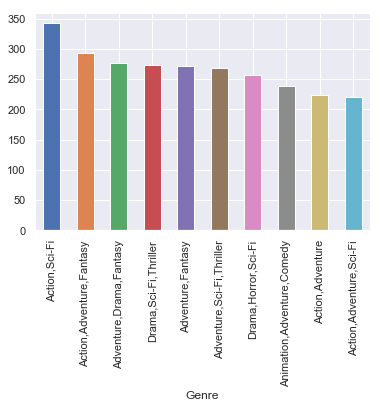

In [6]:

df1=df_movies[df_movies['Revenue (Millions)']> df_movies['Revenue (Millions)'].median()].sort_values(by='Revenue (Millions)', ascending=False)

df1.groupby('Genre')['Revenue (Millions)'].mean().sort_values(ascending=False).head(10).plot.bar()



#Top 10 revenew earning genre combinations

#Votes vs rating

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


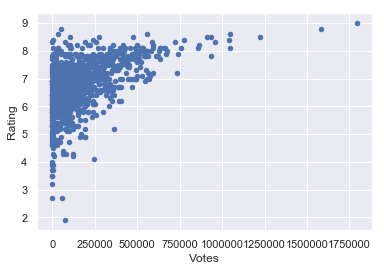

In [7]:
df_movies.plot.scatter(y='Rating', x='Votes')

Rating vs votes shows a positive correlation and with increased votes, rating increases.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


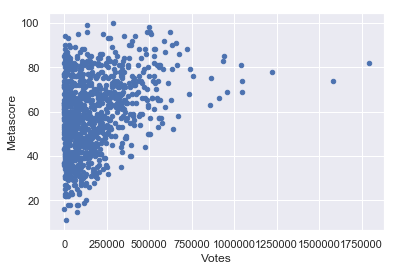

In [8]:
df_movies.plot.scatter(x='Votes', y='Metascore')

There id a positive correlation between vites and metascore.

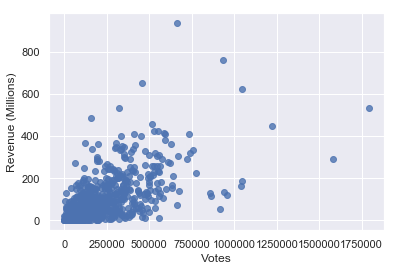

In [4]:
sns.regplot(x = df_movies['Votes'], y = df_movies['Revenue (Millions)'], fit_reg = False)

#votes vs.year

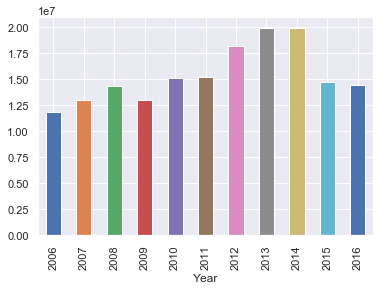

In [9]:
df_movies.groupby('Year')['Votes'].sum().plot.bar()
#df_movies.plot.bar(x='Year', y='Votes')
#df_movies.groupby('Year')['Runtime (Minutes)'].mean().plot(kind='line', figsize = (16, 8), color = 'r')

#df_movies[df_movies['Year'] == 2016]['Votes'].sum()

#Though numbr of films produced in 2016 are far more. number of votes decreased compared to 2014.
There is an upward trend of voting since 2006 to 2014 but after 2014, coting has decreased. The most probable reason could be viwerwes are not keen on expressing their views. May be because of increased usage of internet and availability of better webcontents.

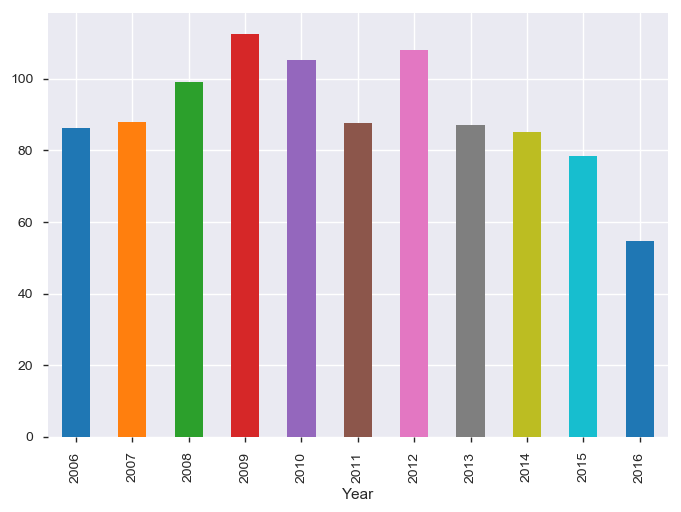

In [26]:
df_movies.groupby('Year')['Revenue (Millions)'].mean().plot.bar()

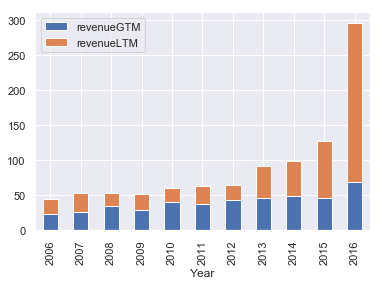

In [25]:
med=df_movies['Revenue (Millions)'].median()
count1=df_movies.groupby('Year').size()
count2 =df_movies[df_movies['Revenue (Millions)'] >med].groupby('Year')['Rank'].count()
df_new=pd.DataFrame({'Released':count1, 'revenueGTM': count2,'revenueLTM': count1-count2,'Ratio':count2/count1})
df_new.loc[:,['revenueGTM','revenueLTM']].plot.bar(stacked=True)

#From 2006 to 2016the number of movies produced in gradually increasinghowever 2013 onwards many movies were produced.though the revenue is increased,ratio nof unsuccessful movies to successful movies has increased. More movies are unsuccessful than successful movies.

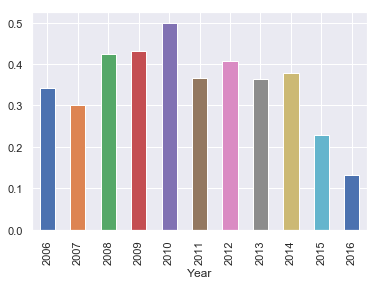

In [11]:
df_new.loc[:,'Ratio'].plot.bar()

#in 2012 80% of the movies performed better than the median however in 2016 morethan 70% movies underperformed on box office. 2012 had the higest success rate for the movies.


In [134]:
df_movies[df_movies['Year']== 2016].groupby('Genre')['Revenue (Millions)'].mean().sort_values(ascending=False).head(5)

Genre
Animation,Comedy,Family       270.320000
Action,Adventure,Sci-Fi       246.097143
Adventure,Drama,Family        225.620000
Animation,Adventure,Comedy    184.629000
Action,Thriller               162.160000
Name: Revenue (Millions), dtype: float64

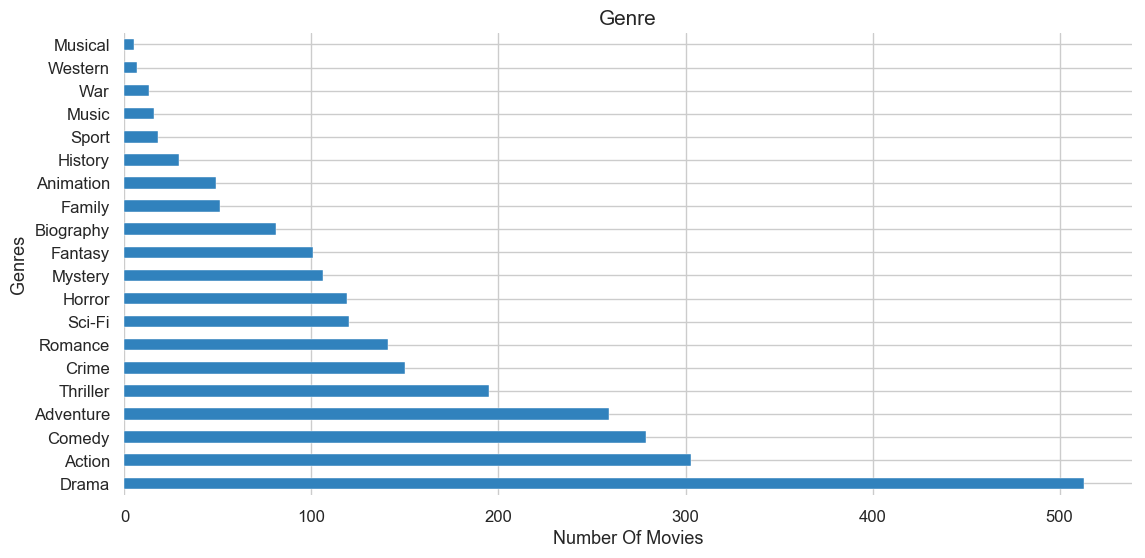

In [28]:
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df_movies[x].str.cat(sep = ',')
    data = pd.Series(data_plot.split(','))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('Genre')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")


The producers are more interested in Genres Drama,Action,Comedy,Adventure and their combination.

# Metascore
1) Metascore vs revenue
2) Metascore and director
3) Genre and Metascore relation


In [71]:
print('Max metascore :', df_movies['Metascore'].max())
print('Min metascore :', df_movies['Metascore'].min())
print('Mean metascore :', df_movies['Metascore'].mean())
print('Median metascore :', df_movies['Metascore'].median())



Max metascore : 100.0
Min metascore : 11.0
Mean metascore : 58.985042735042626
Median metascore : 58.98504273504273


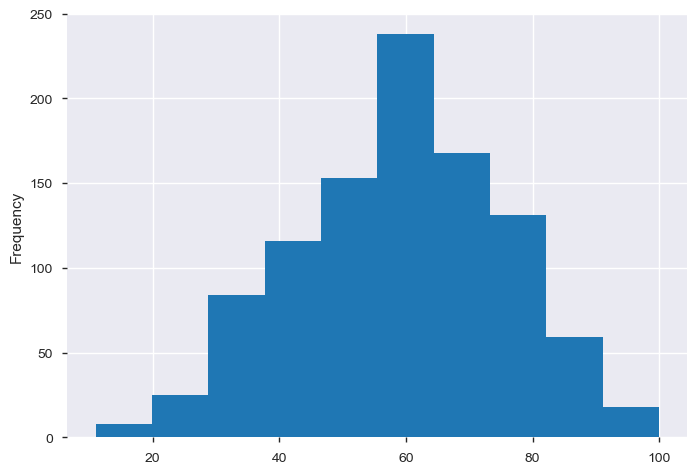

In [72]:
#films appreciated by critics. Average metascotre 58.98.
df_movies['Metascore'].plot.hist()



In [16]:
# the data is by and large normal and mean and median are very close.Movies with metascore more than 75 ( falling in 4th quartile) are movies appreciated by critics.
df_metascore=df_movies[df_movies['Metascore'] > 75]
# check Genre, revenue for the movies
#a = df_metascore.groupby('Genre').size().sort_values(ascending=False).index
#lista=[]
#for i in range(len(a)):
#    ratio=df_metascore[df_metascore['Genre']==a[i]]['Rank'].count()/df_movies[df_movies['Genre']==a[i]]['Rank'].count()*100
#    lista.append([a[i],round(ratio,2)])
#df_ratio = pd.DataFrame(lista, columns=['Genre','Crtic\'s choice'])
#df_ratio.plot.bar(w)


a = df_metascore.groupby('Director').size().sort_values(ascending=False).index
lista=[]
for i in range(len(a)):
    director_critic_choice=df_metascore[df_metascore['Director']==a[i]]['Rank'].count()
    director_total_movies=df_movies[df_movies['Director']==a[i]]['Rank'].count()
    #ratio=df_metascore[df_metascore['Director']==a[i]]['Rank'].count()/df_movies[df_movies['Director']==a[i]]['Rank'].count()*100
    ratio=round((director_critic_choice/director_total_movies)*100,2)
    lista.append([a[i],director_total_movies,director_critic_choice,round(ratio,2)])
df_ratio = pd.DataFrame(lista, columns=['Director','Total Movies','Crtic\'s choice','Ratio'])

#print("Directors who directed only one movie and apreciated by critics.)
df_ratio[(df_ratio['Ratio']==100) & (df_ratio['Crtic\'s choice']==df_ratio['Total Movies']) &(df_ratio['Total Movies']==1)]
#print("Directors who were consistently appreciated by critics for all movies they produced)
df_ratio[(df_ratio['Ratio']==100) & (df_ratio['Crtic\'s choice']==df_ratio['Total Movies']) &(df_ratio['Total Movies']!=1)]

#print("There are 9 Directors who directed more than 1 movies and all movies were appreciated by critics")
#print("There are 82 Directors who directed only one movie and the could make a mark on critcs in the first attempt.)


,Director,Total Movies,Crtic's choice,Ratio
4,Wes Anderson,3,3,100.0
6,Damien Chazelle,2,2,100.0
10,Richard Linklater,2,2,100.0
11,George Miller,2,2,100.0
13,Pete Docter,2,2,100.0
19,Bong Joon Ho,2,2,100.0
22,Kathryn Bigelow,2,2,100.0
26,Jeff Nichols,2,2,100.0
29,Alfonso Cuarón,2,2,100.0


# Conclusion
#70% of the movies appreciated by critics could not perform on box office.
#There are 9 directors who are consistantly appreciated by critics for all movies they directed.
#There are 82 Directors who directed only one movie and the could make a mark on critcs in the first attempt
 


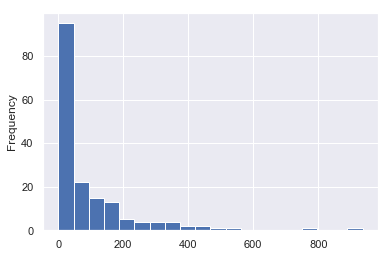

In [23]:
df_metascore['Revenue (Millions)'].plot.hist(bins=20)

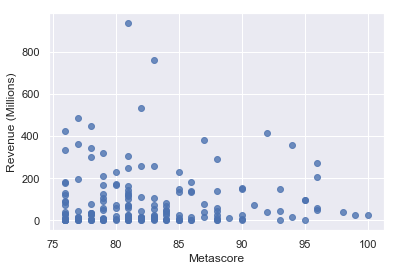

In [26]:
sns.regplot(x = df_metascore['Metascore'], y = df_metascore['Revenue (Millions)'], fit_reg = False)

#Do  ot see a direct correlarion between metascore and revenue